In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
from ast import literal_eval

In [165]:
# 문자열을 리스트나 딕셔너리로 변환
def str_to_list_or_dict(x):
    if type(x) == str:
        return literal_eval(x)
    else:
        return x

In [198]:
df = pd.read_excel('data/imdb_final_3_240613.xlsx')

In [199]:
# 리스트 형 컬럼 변환

for column in df[['production', 'distributor', 'director', 'writer', 'actor']]:
    df[column] = df[column].apply(str_to_list_or_dict)

In [200]:
# 딕셔너리 형 컬럼 변환

for column in df.loc[:, 'season_1' : 'season_17']:
    df[column] = df[column].apply(str_to_list_or_dict)

In [201]:
df.loc[1,'production'], df.loc[1,'distributor'], df.loc[1,'actor']

(['Vlaamse Radio en Televisie (VRT)', 'Eyeworks Film & TV Drama'],
 ['Netflix',
  'Special Broadcasting Service (SBS)',
  'Vlaamse Radio en Televisie (VRT)',
  'Eén',
  'SBS on Demand'],
 ['Luc De Ruelle',
  'Maaike Neuville',
  'Tom Vermeir',
  'Peter Gorissen',
  'Zouzou Ben Chikha',
  'Piet De Praitere',
  'Maaike Cafmeyer',
  'Josse De Pauw',
  'Sofie Decleir',
  'Mieke De Groote'])

In [202]:
df.loc[1, 'season_2']

{'S2.E1': [7.3, 44],
 'S2.E2': [7.4, 33],
 'S2.E3': [7.6, 32],
 'S2.E4': [7.7, 32],
 'S2.E5': [7.8, 31],
 'S2.E6': [8.0, 28],
 'S2.E7': [8.3, 28],
 'S2.E8': [7.5, 36]}

In [215]:
# 배급사 개수 추가

for idx, item in df.iterrows():
    if type(item['distributor']) == list:
        df.loc[idx, 'distributor_num'] = len(item['distributor'])
    else:
        df.loc[idx, 'distributor_num'] = 1

In [279]:
# 제작사 개수 추가

for idx, item in df.iterrows():
    if type(item['production']) == list:
        df.loc[idx, 'production_num'] = len(item['production'])
    else:
        df.loc[idx, 'production_num'] = 1

In [225]:
df['distributor_num'].value_counts()

distributor_num
1.0     527
2.0     173
3.0      89
4.0      29
5.0      17
6.0       8
11.0      5
9.0       5
8.0       5
16.0      4
10.0      3
7.0       3
13.0      3
19.0      3
14.0      2
35.0      2
12.0      2
30.0      2
21.0      2
17.0      2
64.0      1
54.0      1
32.0      1
36.0      1
37.0      1
15.0      1
46.0      1
23.0      1
20.0      1
52.0      1
27.0      1
22.0      1
51.0      1
24.0      1
34.0      1
47.0      1
Name: count, dtype: int64

In [237]:
df.columns

Index(['Unnamed: 0', 'title', 'english_title', 'year', 'total_season_num',
       'runtime', 'genre', 'age_rating', 'age_miss', 'justwatch_us_age',
       'production_country', 'total_count', 'total_rate', 'watchlist',
       'popularity', 'user_review', 'critic_review', 'production',
       'distributor', 'season_1', 'season_2', 'season_3', 'season_4',
       'season_5', 'season_6', 'season_7', 'season_8', 'season_9', 'season_10',
       'season_11', 'season_12', 'season_13', 'season_14', 'season_15',
       'season_16', 'season_17', 'director', 'writer', 'actor', 'imdb_title',
       'imdb_url', 'distributor_num'],
      dtype='object')

In [281]:
corr = df.loc[:,['year', 'total_season_num', 'total_count', 'total_rate', 'watchlist', 'popularity', 'user_review', 'critic_review', 'distributor_num', 'production_num']].corr()
corr

,year,total_season_num,total_count,total_rate,watchlist,popularity,user_review,critic_review,distributor_num,production_num
year,1.000000,-0.539187,-0.283583,-0.289410,-0.311361,0.072644,-0.174869,-0.256396,-0.512271,-0.151428
total_season_num,-0.539187,1.000000,0.461514,0.266341,0.575406,-0.058374,0.372958,0.476983,0.649683,0.271805
total_count,-0.283583,0.461514,1.000000,0.292607,0.938392,-0.108995,0.726830,0.774600,0.553678,0.281152
total_rate,-0.289410,0.266341,0.292607,1.000000,0.330815,0.094719,0.212402,0.239180,0.254948,0.161418
watchlist,-0.311361,0.575406,0.938392,0.330815,1.000000,-0.115117,0.737508,0.818764,0.612093,0.354232
popularity,0.072644,-0.058374,-0.108995,0.094719,-0.115117,1.000000,-0.043781,-0.062824,-0.078178,0.003514
user_review,-0.174869,0.372958,0.726830,0.212402,0.737508,-0.043781,1.000000,0.757422,0.292351,0.299040
critic_review,-0.256396,0.476983,0.774600,0.239180,0.818764,-0.062824,0.757422,1.000000,0.371851,0.334314
distributor_num,-0.512271,0.649683,0.553678,0.254948,0.612093,-0.078178,0.292351,0.371851,1.000000,0.346318
production_num,-0.151428,0.271805,0.281152,0.161418,0.354232,0.003514,0.299040,0.334314,0.346318,1.000000


<Axes: >

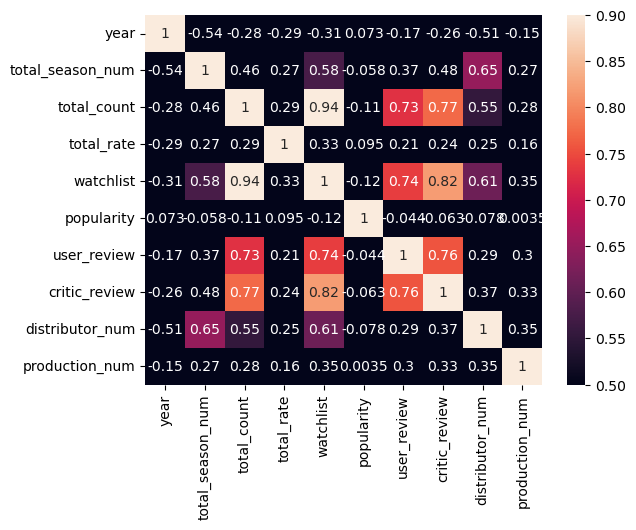

In [282]:
sns.heatmap(data=corr, annot=True, vmin=0.5, vmax=0.9)

 #### 왓치리스트 등록수와 유저 리뷰수, 전문가 리뷰수가 **0.74**, **0.82**로 높은 연관성을 가짐
 - 전문가 리뷰수가 많다는 것으로 작품에 대한 기대치가 높았기 때문이거나 큰 이슈가 되었기 때문이라고 보임
    (전문가 리뷰는 작은 사이트에 게재하는 리뷰도 포함 됨. 조회수를 위해 이슈가 되는 작품을 뒤늦게라도 리뷰함)
 - 유저 리뷰수가 높다는 것은 긍정적이든 부정적이든 이슈가 되었고 화제성이 높았다는 것으로 볼 수 있음

 #### 총 투표수와 유저 리뷰수, 전문가 리뷰수가 **0.73**, **0.77**로 높은 연관성을 가짐
  - 관심도가 높기 때문에 연관성이 높은 것은 당연하고 자연스러운 결과

 #### 총 투표수와 왓치리스트 등록수가 **0.94**로 매우 높은 연관성을 가짐
  - 관심도가 높거나 이슈가 되었기에 투표수가 높고 왓치리스트에 등록하는 것이 높다는 것도 자연스러움

### 일단 왓치리스트 등록수, 총 투표수, 유저 리뷰수, 전문가 리뷰수로 화제성을 평가할 수 있을 것으로 보임

In [297]:
df.loc[:, 'title':'distributor'].sort_values(by='total_count', ascending=False).head(10)

,title,english_title,year,total_season_num,runtime,genre,age_rating,age_miss,justwatch_us_age,production_country,total_count,total_rate,watchlist,popularity,user_review,critic_review,production,distributor
17,브레이킹 배드,Breaking Bad,2008,5,47,"드라마, 범죄, 스릴러",19,18,TV-MA,미국,2200000,9.5,1168000,24,4900,175,"[Sony Pictures Television, High Bridge Product...","[Videoload, ORF 1, SRF zwei, e2, Österreichisc..."
24,기묘한 이야기,Stranger Things,2016,4,61,"드라마, SF, 스릴러, 판타지, 공포",15,15,TV-14,미국,1300000,8.7,1015000,26,3800,425,"[Monkey Massacre, 21 Laps Entertainment, Netfl...","[Warner Home Video, Netflix]"
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,15,TV-MA,미국,1100000,8.1,980000,29,2600,357,"[AMC Studios, American Movie Classics (AMC), I...","[FX Network, Orange Cinéma Séries, CNBC-e, Tud..."
54,덱스터,Dexter,2006,8,53,"범죄, 드라마, 스릴러",19,19,TV-MA,미국,774000,8.6,570000,31,1000,241,"[The Colleton Company, Showtime Networks, John...","[ORF 1, 13th Street, Sky Replay, SRF zwei, e2,..."
27,피키 블라인더스,Peaky Blinders,2013,6,58,"드라마, 범죄",19,18,TV-MA,영국,657000,8.8,790000,54,1300,92,"[Tiger Aspect Productions, Caryn Mandabach Pro...","[2 Entertain Video, Filmbox Plus, BBC iPlayer,..."
42,베터 콜 사울,Better Call Saul,2015,6,50,"범죄, 드라마",19,18,TV-MA,미국,655000,9.0,560000,63,1600,143,"[Gran Via Productions, American Movie Classics...","[Amazon Instant Video, Videoload, Netflix Worl..."
46,블랙 미러,Black Mirror,2011,6,59,"SF, 스릴러, 범죄, 드라마",NaN,18,TV-MA,영국,644000,8.7,690000,57,1000,156,"[Babieka, House Of Tomorrow, Zeppotron, Broke ...","[Netflix, RTL Crime, Just Bridge Entertainment..."
19,바이킹스,Vikings,2013,7,45,"액션, 드라마, 전쟁, 로맨스, 역사, Made in Europe",19,18,TV-14,캐나다,587000,8.5,760000,76,1400,78,"[Corus Entertainment, MGM Television, Shaw Med...","[Shaw Media, CNBC-e, RAI Radiotelevisione Ital..."
31,위쳐,The Witcher,2019,3,57,"액션, SF, 드라마, 판타지",19,18,TV-MA,미국,574000,8.0,500000,107,5700,171,"[Cinesite, Hivemind, Platige Image, Netflix, P...",[Netflix]
43,퀸스 갬빗,The Queen's Gambit,2020,1,56,드라마,19,18,TV-MA,미국,561000,8.5,360000,301,2600,138,"[Flitcraft, Wonderful Films, Netflix]",[Netflix]


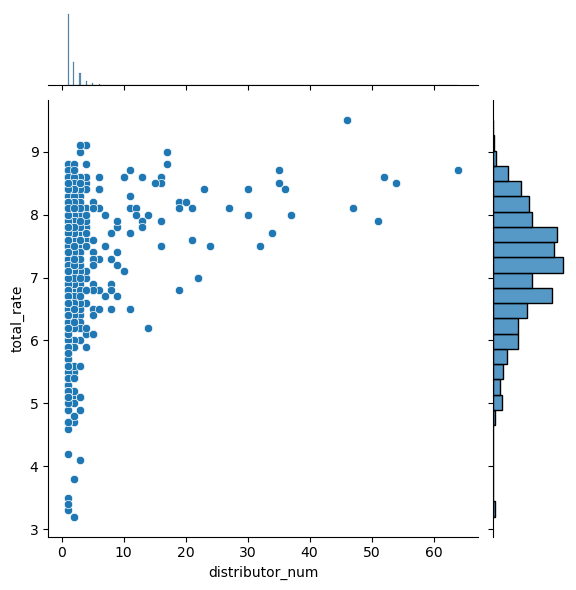

In [236]:
sns.jointplot(y=df['total_rate'], x=df['distributor_num'])

In [300]:
# 배급사가 10개 이상인 작품수는 43개
df.loc[df['distributor_num'] > 10, 'title':'distributor']

,title,english_title,year,total_season_num,runtime,genre,age_rating,age_miss,justwatch_us_age,production_country,total_count,total_rate,watchlist,popularity,user_review,critic_review,production,distributor
6,굿 닥터,The Good Doctor,2017,6,43,드라마,15,15,TV-14,미국,116000,8.0,210000,74,878,36,"[EnterMedia Content, Shore Z Productions, Sony...","[Videoload, Sony Pictures Television Internati..."
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,15,TV-MA,미국,1100000,8.1,980000,29,2600,357,"[AMC Studios, American Movie Classics (AMC), I...","[FX Network, Orange Cinéma Séries, CNBC-e, Tud..."
8,"비르기트: 왕국, 권력, 영광",Borgen - Power & Glory,2022,4,58,"전쟁, 드라마, Made in Europe",15,15,TV-MA,덴마크,30000,8.5,54000,1404,136,0,"[Nordisk Film & TV-Fond, Danmarks Radio (DR), ...","[Videoload, hr-fernsehen, Österreichischer Run..."
9,The Flash,The Flash,2014,9,45,"액션, 드라마, SF",15,15,TV-PG,미국,369000,7.5,520000,203,1300,109,"[WarnerMedia, Warner Bros. Television, Berlant...","[DiziMax, Videoload, e2, HBO Max, CNBC-e, ProS..."
12,Suits,Suits,2011,9,44,"코미디, 드라마",15,15,TV-MA,미국,483000,8.4,520000,19,859,57,"[Untitled Korsh Company, Hypnotic, Universal C...","[DiziMax, Videoload, My Network TV, M-Net, RTL..."
14,아웃랜더,Outlander,2014,6,60,"드라마, 판타지, 로맨스, SF",NaN,18,연령 정보 없음,미국,180000,8.4,330000,69,1000,51,"[Sony Pictures Television, Soundtrack New York...","[Videoload, ORF 1, SRF zwei, Österreichischer ..."
17,브레이킹 배드,Breaking Bad,2008,5,47,"드라마, 범죄, 스릴러",19,18,TV-MA,미국,2200000,9.5,1168000,24,4900,175,"[Sony Pictures Television, High Bridge Product...","[Videoload, ORF 1, SRF zwei, e2, Österreichisc..."
19,바이킹스,Vikings,2013,7,45,"액션, 드라마, 전쟁, 로맨스, 역사, Made in Europe",19,18,TV-14,캐나다,587000,8.5,760000,76,1400,78,"[Corus Entertainment, MGM Television, Shaw Med...","[Shaw Media, CNBC-e, RAI Radiotelevisione Ital..."
21,원헌드레드,The 100,2014,7,42,"SF, 액션, 드라마",15,15,TV-14,미국,278000,7.6,420000,168,1800,70,"[Warner Bros. Television, Alloy Entertainment,...","[DiziMax, Videoload, Sixx, Syfy, The CW Networ..."
23,블랙리스트,The Blacklist,2013,10,43,"스릴러, 범죄, 드라마",15,15,TV-MA,미국,281000,7.9,420000,136,1400,60,"[Sony Pictures Television, Universal Televisio...","[TVNOW, Videoload, ORF 1, Sony AXN, Global, RT..."


In [291]:
df.sort_values(by='distributor_num', ascending=False).loc[df['distributor_num'] > 10, 'distributor'].head(10)

28    [Puls 4, DiziMax, TVNOW, ORF 1, 13th Street, C...
19    [Shaw Media, CNBC-e, RAI Radiotelevisione Ital...
54    [ORF 1, 13th Street, Sky Replay, SRF zwei, e2,...
23    [TVNOW, Videoload, ORF 1, Sony AXN, Global, RT...
7     [FX Network, Orange Cinéma Séries, CNBC-e, Tud...
17    [Videoload, ORF 1, SRF zwei, e2, Österreichisc...
6     [Videoload, Sony Pictures Television Internati...
12    [DiziMax, Videoload, My Network TV, M-Net, RTL...
49    [Zweites Deutsches Fernsehen (ZDF), ORF 1, Öst...
8     [Videoload, hr-fernsehen, Österreichischer Run...
Name: distributor, dtype: object

#### 배급사의 개수가 흥행을 유도한다고 보기 어렵다
 - 시즌1을 공개할 때의 정보부터 살펴봐야 정확하겠지만 그러기엔 어려우니 현재 정보로만 보겠음
 - 모든 작품은 특수한 경우를 제외하면 3개 이상의 시즌을 가짐 (에일리어니스트만 시즌2개. 19세기 뉴욕을 배경으로 연쇄 살인범을 찾는 의사이자 리포터인 시어도르 루즈벨트를 다룬 드라마. 특유의 독특함이 통했나?)
 - 명작이나 어느 한 시기에 가장 핫한 드라마로 이름을 알렸던 드라마들이 다수로 보임
 - 평점 역시 대부분 준수한 수준
 - 시즌이 길어지면서 자연스럽게 여러 국가의 방송사에 판권이 팔리면서 배급사가 많아진 것으로 보임

 ### 반대로 흥행했기 때문에 배급사가 늘어났다고 보인다

In [304]:
df['total_season_num'].value_counts()

total_season_num
1     631
2     138
3      56
4      32
5      16
6      13
7      13
8       4
9       3
11      1
10      1
17      1
Name: count, dtype: int64

In [255]:
df.loc[df['total_rate'] > 9, 'title':'distributor']

,title,english_title,year,total_season_num,runtime,genre,age_rating,age_miss,justwatch_us_age,production_country,total_count,total_rate,watchlist,popularity,user_review,critic_review,production,distributor
17,브레이킹 배드,Breaking Bad,2008,5,47,"드라마, 범죄, 스릴러",19,18,TV-MA,미국,2200000,9.5,1168000,24,4900,175,"[Sony Pictures Television, High Bridge Product...","[Videoload, ORF 1, SRF zwei, e2, Österreichisc..."
133,응답하라 1988,Reply 1988,2015,1,71,"코미디, 로맨스, 드라마, 가족",15,15,TV-14,대한민국,12000,9.1,14000,1852,123,3,[CJ E&M],"[tvN, Amazon Prime Video, Disney+, Netflix]"
136,나의 아저씨,My Mister,2018,1,79,"드라마, 가족",15,15,TV-14,대한민국,9700,9.1,13000,2322,227,1,NaN,"[tvN, Netflix, Disney+]"


In [256]:
df.loc[df['total_rate'] > 8, 'title':'distributor']

,title,english_title,year,total_season_num,runtime,genre,age_rating,age_miss,justwatch_us_age,production_country,total_count,total_rate,watchlist,popularity,user_review,critic_review,production,distributor
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,15,TV-MA,미국,1100000,8.1,980000,29,2600,357,"[AMC Studios, American Movie Classics (AMC), I...","[FX Network, Orange Cinéma Séries, CNBC-e, Tud..."
8,"비르기트: 왕국, 권력, 영광",Borgen - Power & Glory,2022,4,58,"전쟁, 드라마, Made in Europe",15,15,TV-MA,덴마크,30000,8.5,54000,1404,136,0,"[Nordisk Film & TV-Fond, Danmarks Radio (DR), ...","[Videoload, hr-fernsehen, Österreichischer Run..."
10,슬기로운 감빵생활,Prison Playbook,2017,1,91,"드라마, 코미디",15,15,TV-MA,대한민국,4900,8.4,8500,4824,55,0,[TVN],"[tvN, TVN, Netflix, Disney+]"
12,Suits,Suits,2011,9,44,"코미디, 드라마",15,15,TV-MA,미국,483000,8.4,520000,19,859,57,"[Untitled Korsh Company, Hypnotic, Universal C...","[DiziMax, Videoload, My Network TV, M-Net, RTL..."
13,다크,Dark,2017,3,56,"드라마, SF, 스릴러, 범죄",19,18,TV-MA,독일,449000,8.7,500000,149,4100,182,"[Netflix, W&B Television]",[Netflix]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ingansilgyeog,Lost,2021,1,70,"로맨스, 드라마",15,15,연령 정보 없음,대한민국,533,8.2,1800,0,23,2,NaN,[JTBC]
769,에토스,Ethos,2020,1,49,드라마,19,18,연령 정보 없음,터키,30000,8.5,21000,0,185,11,[Krek Film],[Netflix]
829,상은,Addicted Heroin,2016,1,17,"드라마, 코미디, 로맨스",NaN,NaN,TV-14,중국,1800,8.1,2900,0,19,0,[Beijing Fengmang Culture Communication Co.],[Beijing Magic Pictures Co.]
854,46,Vanished 46,2016,1,62,"스릴러, SF, 드라마, 액션, 범죄",15,15,TV-MA,터키,4800,8.1,3700,0,21,0,[Nunova Film],"[Star TV, Puhu TV, Netflix]"


In [278]:
df_tmp = df[df['total_season_num'] > 1]
df_tmp.loc[df['total_rate'] > 8, 'title':'distributor']

,title,english_title,year,total_season_num,runtime,genre,age_rating,age_miss,justwatch_us_age,production_country,total_count,total_rate,watchlist,popularity,user_review,critic_review,production,distributor
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,15,TV-MA,미국,1100000,8.1,980000,29,2600,357,"[AMC Studios, American Movie Classics (AMC), I...","[FX Network, Orange Cinéma Séries, CNBC-e, Tud..."
8,"비르기트: 왕국, 권력, 영광",Borgen - Power & Glory,2022,4,58,"전쟁, 드라마, Made in Europe",15,15,TV-MA,덴마크,30000,8.5,54000,1404,136,0,"[Nordisk Film & TV-Fond, Danmarks Radio (DR), ...","[Videoload, hr-fernsehen, Österreichischer Run..."
12,Suits,Suits,2011,9,44,"코미디, 드라마",15,15,TV-MA,미국,483000,8.4,520000,19,859,57,"[Untitled Korsh Company, Hypnotic, Universal C...","[DiziMax, Videoload, My Network TV, M-Net, RTL..."
13,다크,Dark,2017,3,56,"드라마, SF, 스릴러, 범죄",19,18,TV-MA,독일,449000,8.7,500000,149,4100,182,"[Netflix, W&B Television]",[Netflix]
14,아웃랜더,Outlander,2014,6,60,"드라마, 판타지, 로맨스, SF",NaN,18,연령 정보 없음,미국,180000,8.4,330000,69,1000,51,"[Sony Pictures Television, Soundtrack New York...","[Videoload, ORF 1, SRF zwei, Österreichischer ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,신성한 게임,Sacred Games,2018,2,50,"범죄, 액션, 드라마, 스릴러",19,18,TV-MA,인도,93000,8.5,61000,3127,849,26,"[Reliance Entertainment, Netflix, Phantom Films]",[Netflix]
519,심야식당: 도쿄 스토리,Midnight Diner: Tokyo Stories,2016,2,32,드라마,15,15,TV-14,일본,5000,8.4,7000,0,51,5,[Netflix],[Netflix]
536,우리 둘이 날마다,Little Things,2016,4,26,"드라마, 코미디, 로맨스",12,12,TV-MA,인도,7600,8.2,6100,0,118,9,"[Dice Media, Pocket Aces Pictures]","[Dice Media, Netflix]"
600,클럽 디 쿠에르보스,Club de Cuervos,2015,4,46,"드라마, 코미디, 스포츠",NaN,18,연령 정보 없음,멕시코,6200,8.2,7300,4132,25,3,[Alazraki Films],[Netflix]


In [227]:
# 배급사가 2개 이상(넷플릭스 오리지널이 아닌)인 작품

df[df['distributor_num'] > 2]

,Unnamed: 0,title,english_title,year,total_season_num,runtime,genre,age_rating,age_miss,justwatch_us_age,...,season_14,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,distributor_num
1,1,12인의 심판자,The Twelve,2019,2,54,"드라마, 스릴러",NaN,18,TV-MA,...,NaN,NaN,NaN,NaN,"[Kaat Beels, Wouter Bouvijn]","[Bert Van Dael, Nele Meirhaeghe, Roel Mondelae...","[Luc De Ruelle, Maaike Neuville, Tom Vermeir, ...",The Twelve (TV Series 2019–2023),https://www.imdb.com/title/tt7605396/,5.0
6,6,굿 닥터,The Good Doctor,2017,6,43,드라마,15,15,TV-14,...,NaN,NaN,NaN,NaN,"[Aaron Rottinghaus, Allison Liddi-Brown, Alric...","[Adam Scott Weissman, April Fitzsimmons, Bill ...","[Freddie Highmore, Richard Schiff, Hill Harper...",The Good Doctor (TV Series 2017–2024),https://www.imdb.com/title/tt6470478/,37.0
7,7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,15,TV-MA,...,NaN,NaN,NaN,NaN,"[Aisha Tyler, Alrick Riley, Avi Youabian, Bill...","[Adam Fierro, Angela Kang, Channing Powell, Ch...","[Norman Reedus, Melissa McBride, Lauren Cohan,...",The Walking Dead (TV Series 2010–2022),https://www.imdb.com/title/tt1520211/,47.0
8,8,"비르기트: 왕국, 권력, 영광",Borgen - Power & Glory,2022,4,58,"전쟁, 드라마, Made in Europe",15,15,TV-MA,...,NaN,NaN,NaN,NaN,"[Annette K. Olesen, Charlotte Sieling, Dagur K...","[Adam Price, Emilie Lebech Kaae, Jannik Tai Mo...","[Sidse Babett Knudsen, Birgitte Hjort Sørensen...",Borgen (TV Series 2010–2022),https://www.imdb.com/title/tt1526318/,35.0
9,9,The Flash,The Flash,2014,9,45,"액션, 드라마, SF",15,15,TV-PG,...,NaN,NaN,NaN,NaN,"[Alexandra La Roche, Alice Troughton, Amanda T...","[Aaron Helbing, Alex Boyd, Alison Schapker, An...","[Grant Gustin, Candice Patton, Danielle Panaba...",The Flash (TV Series 2014–2023),https://www.imdb.com/title/tt3107288/,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,856,13계명,13 Commandments,2018,1,46,"스릴러, 범죄, 드라마, Made in Europe",19,18,연령 정보 없음,...,NaN,NaN,NaN,NaN,"[Maarten Moerkerke, Max Osswald]","[Dirk Nielandt, Frauke Heyde, Geert Verbanck, ...","[Dirk van Dijck, Marie Vinck, Karlijn Sileghem...",13 Geboden (TV Series 2017–2018),https://www.imdb.com/title/tt5203748/,3.0
858,858,엠파이어 옥토버페스트,Oktoberfest: Beer & Blood,2020,1,48,"드라마, 역사, 스릴러",NaN,18,TV-MA,...,NaN,NaN,NaN,NaN,[Hannu Salonen],"[Alexis Wittgenstein, Christian Lex, Christian...","[Misel Maticevic, Martina Gedeck, Klaus Steinb...",Oktoberfest: Beer & Blood (TV Mini Series 2020),https://www.imdb.com/title/tt10244612/,5.0
884,884,"친애적, 열애적",Go Go Squid!,2019,1,45,"드라마, 로맨스, 스포츠",15,15,연령 정보 없음,...,NaN,NaN,NaN,NaN,"[Gia Lee, Hongru Chen, Xujing Xiang, Yiru Chen]",[Mobao Feibao],"[Zi Yang, Xian Li, Mingde Li, Yifan Wen, Hong-...",Go Go Squid! (TV Series 2019),https://www.imdb.com/title/tt10369876/,8.0
886,886,거짓말의 거짓말,Mythomaniac,2019,2,46,"코미디, 드라마",19,18,TV-MA,...,NaN,NaN,NaN,NaN,[Fabrice Gobert],"[Anne Berest, Fabrice Gobert, Lola Resch]","[Marina Hands, Mathieu Demy, Jérémy Gillet, Ze...",Mythomaniac (TV Series 2019–2021),https://www.imdb.com/title/tt10677432/,4.0
